# Chapter 7

## Fourier Transform


#### Fast Fourier Transform using Python

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pip install pydicom

In [9]:
%matplotlib inline
import skimage
print(skimage.__version__)

import numpy as np
import PIL as pil

from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat

from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage

from skimage import viewer
from skimage.viewer import ImageViewer
# https://scikit-image.org/docs/dev/user_guide/viewer.html

import skimage as skim
import skimage.io as skim_io
import skimage.transform as skim_tr
import skimage.util as skim_ut

import matplotlib.image as mpimg
import matplotlib.pylab as plt

from scipy.ndimage import affine_transform, zoom
from scipy import misc
import scipy.ndimage
import scipy 

0.16.2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Viewer requires Qt
  del sys.path[0]


In [10]:
!pip install scipy
!pip install "scipy==1.1.0"

[[ 92.         190.40368654  87.26423398 ... 171.73952013  87.26423398
  190.40368654]
 [ 97.78855376 111.14609834  82.10233156 ...  79.75303201  31.15508387
  213.1483756 ]
 [ 85.15270091  50.73301356 105.8065082  ... 106.03791946 124.30043584
   22.49211617]
 ...
 [177.84442701 298.51346592 230.00811355 ... 126.03226365  44.91955769
  125.96913244]
 [ 85.15270091  22.49211617 124.30043584 ... 135.42691951 105.8065082
   50.73301356]
 [ 97.78855376 213.1483756   31.15508387 ...  75.22962101  82.10233156
  111.14609834]]


/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

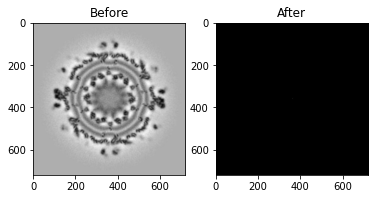

In [11]:
import scipy.fftpack as fftim
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/DIP colab/fft1.png').convert('L') 
#f = np.fft.ifft2(b, s=None, axes=(-2,-1))
# Performing FFT.
c = abs(fftim.fft2(b))
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)

# Converting the d to floating type and saving it 
# as fft1_output.raw in Figures folder.
d.astype('float').tofile('/content/drive/MyDrive/DIP colab/OUTPUT/fft1_output.raw')
print(d)
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(d, cmap='gray')
ax.set_title('After')


#### Ideal Lowpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

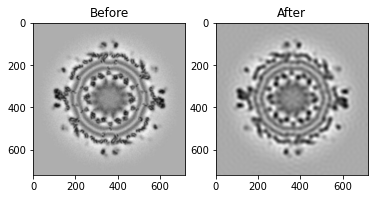

In [12]:
import cv2
import numpy, math
import scipy.fftpack as fftim   
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/DIP colab/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c) 

# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]  
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for ILPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to eliminate 
        # high frequency.
        if r > d_0:
            H[i,j] = 0.0
# Converting H to an image.
H =  Image.fromarray(H) 
# Performing the convolution.
con = d * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving e as ilowpass_output.png in
# Figures folder .
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Butterworth Lowpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

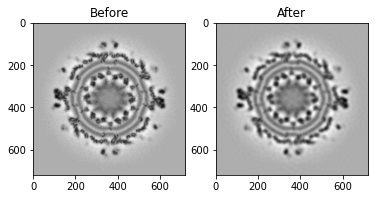

In [13]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/DIP colab/fft1.png').convert('L')
 # Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BLPF
t2 = 2*t1

# Defining the convolution function for BLPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate high frequency.
        if r > d_0:
            H[i,j] = 1/(1 + (r/d_0)**t1)

# Converting H to an image
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving e.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Gaussian Lowpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

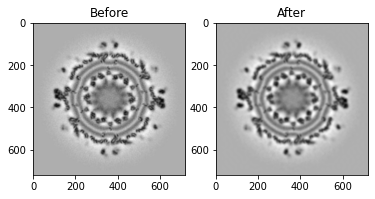

In [14]:
import numpy, math  
import cv2
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/DIP colab/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2  
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0    
# Defining the convolution function for GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # euclidean distance from 
        # origin is computed
        r = math.sqrt(r1) 
        # using cut-off radius to 
        # eliminate high frequency 
        if r > d_0:
            H[i,j] = math.exp(-r**2/t1**2)
            
# Converting H to an image.
H =  Image.fromarray(H)    
# Performing the convolution.
con = d * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving the image as glowpass_output.png in
# Figures folder .
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Ideal Highpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

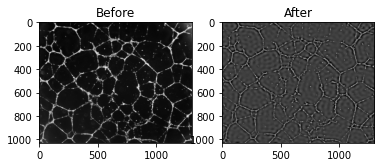

In [15]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale
a = Image.open('/content/drive/MyDrive/DIP colab/endothelium.png').convert('L')
# Performing FFT.
b = fftim.fft2(a)
# shifting the Fourier frequency image
c = fftim.fftshift(b)

# intializing variables for convolution function
M = c.shape[0]
N = c.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius

# Defining the convolution function for IHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
		# origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 0.0
# Performing the convolution.
con = c * H
# Computing the magnitude of the inverse FFT.
d = abs(fftim.ifft2(con))
# Saving the image as ihighpass_output.png in
# Figures folder.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(d, cmap='gray')
ax.set_title('After')

#### Butterworth Highpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

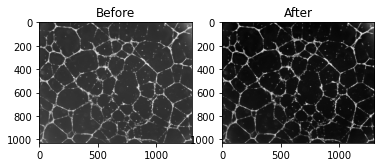

In [16]:
import cv2
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image.
a = cv2.imread('/content/drive/MyDrive/DIP colab/endothelium.png')
# Converting the image to grayscale.
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
# Performing FFT.
c = fftim.fft2(b) 
# Shifting the Fourier frequency image.    
d = fftim.fftshift(c) 
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and 
# values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 1 # the order of BHPF
t2 = 2*t1    

# Defining the convolution function for BHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1)
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:   
            H[i,j] = 1/(1 + (r/d_0)**t2) 

# Converting H to an image.
H = Image.fromarray(H) 	
# performing the convolution 
con = d * H 
# computing the magnitude of the inverse FFT
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('After')

#### Gaussian Highpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

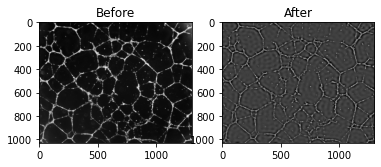

In [17]:
import cv2
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
a = Image.open('/content/drive/MyDrive/DIP colab/endothelium.png').convert('L') 
# Performing FFT.
b = fftim.fft2(a) 
# Shifting the Fourier frequency image. 
c = fftim.fftshift(b) 

# Intializing variables for convolution function.
M = c.shape[0] 
N = c.shape[1]
# H is defined and values in H are initialized to 1.
H = numpy.ones((M,N)) 
center1 = M/2   
center2 = N/2
d_0 = 30.0 # cut-off radius
t1 = 2*d_0

# Defining the convolution function for GHPF.
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from 
        # origin is computed.
        r = math.sqrt(r1) 
        # Using cut-off radius to 
        # eliminate low frequency.
        if 0 < r < d_0:
            H[i,j] = 1 - math.exp(-r**2/t1**2)

# Converting H to an image.
H = Image.fromarray(H) 
# Performing the convolution.
con = c * H 
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con)) 
# Saving the image as ghighpass_output.png in
# Figures folder.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(a, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')

#### Bandpass Filter

/usr/local/lib/python3.6/dist-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


Text(0.5, 1.0, 'After')

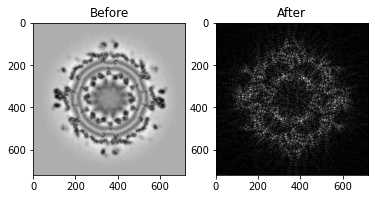

In [18]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('/content/drive/MyDrive/DIP colab/fft1.png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
		# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving the image as ibandpass_output.png.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')